# Q1: Scipy

In [208]:
pip install Ipython

Note: you may need to restart the kernel to use updated packages.


2. Create a scatterplot with the Fare paid and the Age, 
differ the plot color by gender


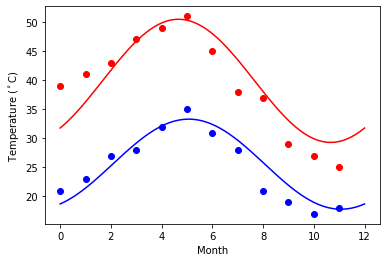

In [209]:
print(__doc__)

import numpy as np
from scipy import optimize
import matplotlib as mpl
import matplotlib.pyplot as plt

# dataset of min and max temperatures.
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)


#Fitting it to a periodic function..
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

#Plotting the fit
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

# Q2:  Matplotlib

In [210]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

url=r'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url, skip_blank_lines=True)
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [211]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


Text(0.5, 1.0, 'Fare paid and the Age')

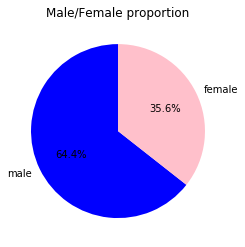

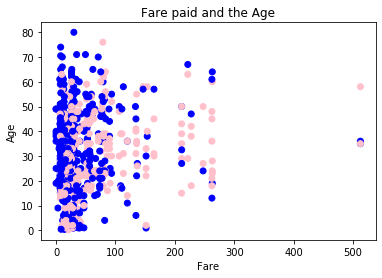

In [254]:
'''1. Create a pie chart presenting the male/female proportion'''

count=titanic["sex"].value_counts()
labels = 'Male', 'Female'
colors = ['blue', 'pink']
f1, ax1 = plt.subplots()
ax1.pie(count.values.tolist(), labels=count.index.values.tolist(), colors=colors, autopct='%.1f%%', startangle=90)
ax1.set_title('Male/Female proportion')

'''2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender'''

colors = {'male':'blue', 'female':'pink'}
f2, ax2 = plt.subplots()
ax2.scatter(titanic['fare'], titanic['age'], alpha=0.5, c=titanic['sex'].apply(lambda x: colors[x]))
ax2.set_xlabel('Fare')
ax2.set_ylabel('Age')
ax2.set_title('Fare paid and the Age')

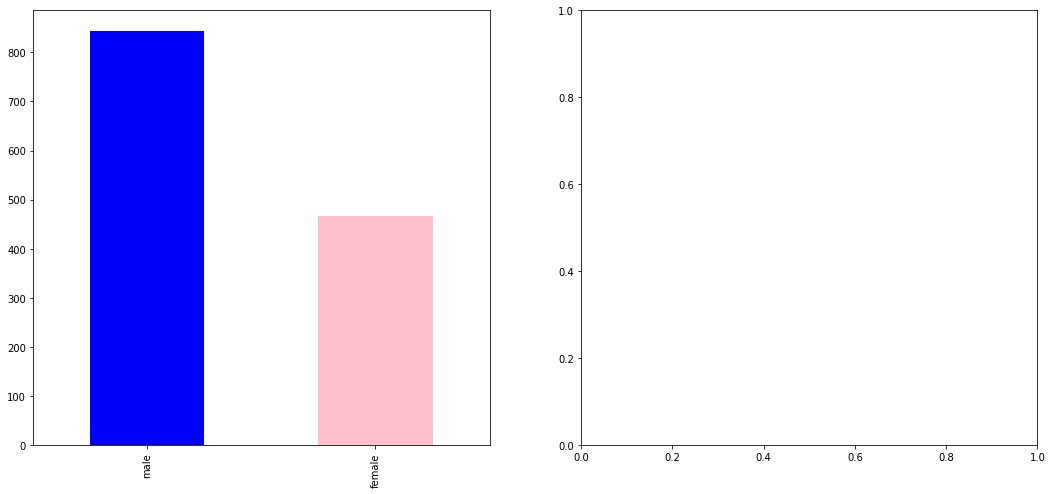

In [269]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
titanic["sex"].value_counts().plot.bar(color = ['blue','pink'], ax = ax[0])
